In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('ggplot')

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
target = 'class'
names =  ['sepal length', 'sepal width', 'petal length', 'petal width', target]
df = pd.read_csv(url, names=names, sep=',', header= None)

In [8]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
print(' {} number of samples, {} number of feature '.format(df.shape[0],df.shape[1]))

 150 number of samples, 5 number of feature 


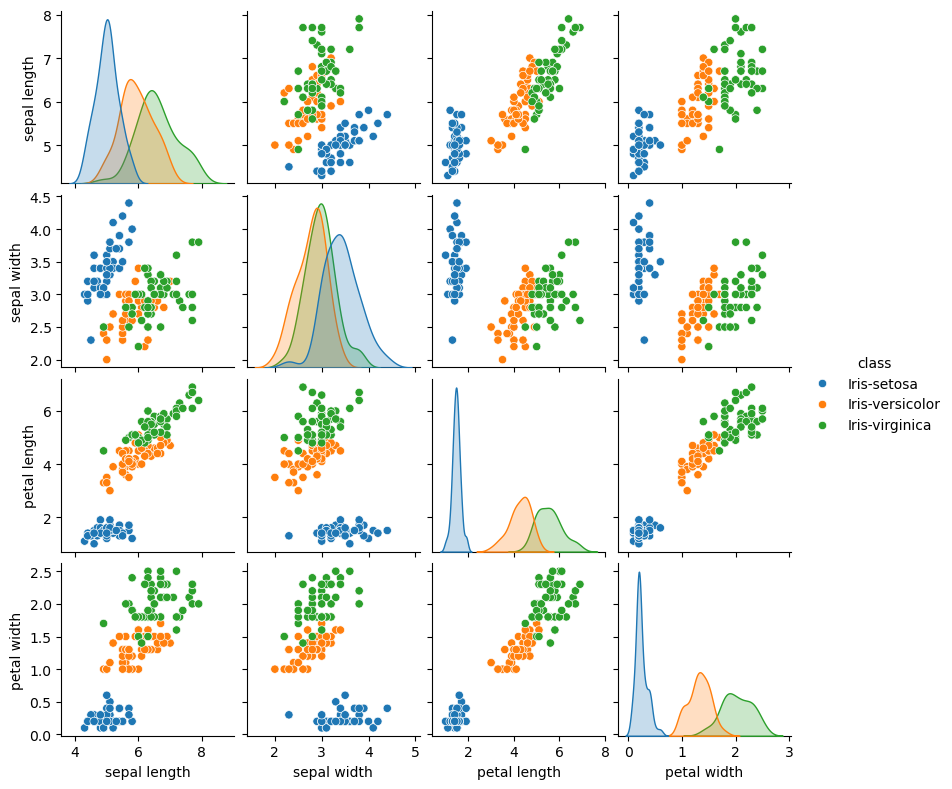

In [13]:
sns.pairplot(df, hue=target, height=2)

In [20]:
X = df.drop(target, axis=1)
X.shape

(150, 4)

In [22]:
y = df[target]
y.shape

(150,)

<Axes: >

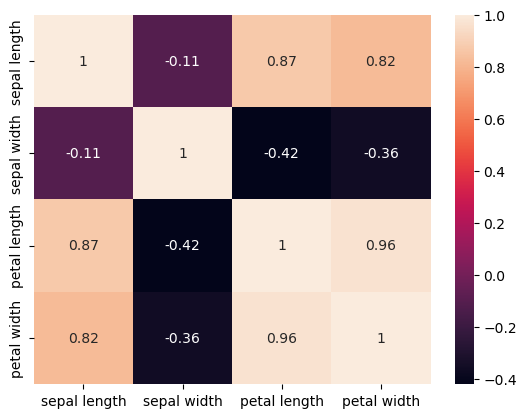

In [23]:
corr = X.corr()
sns.heatmap(corr, annot=True)

In [27]:
from sklearn.model_selection import train_test_split
randomState = 42
train_size = 0.67       # 67% nel train set
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=randomState, train_size=train_size)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(100, 4) (50, 4) (100,) (50,)


In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy') 
model.fit(Xtrain, ytrain)
ytrain_dt = model.predict(Xtrain)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(ytrain,ytrain_dt)
print('The accuracy on training set is {0:.2f}%'.format(accuracy_train*100))

The accuracy on training set is 100.00%


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

ytest_dt = model.predict(Xtest)
accuracy_test = accuracy_score(ytest,ytest_dt)
print('The accuracy on the test set is {0:.2f}%'.format(accuracy_test*100))

The accuracy on the test set is 98.00%


[Text(0.4444444444444444, 0.9285714285714286, 'petal length <= 2.45\nentropy = 1.583\nsamples = 100.0%\nvalue = [0.31, 0.35, 0.34]\nclass = versicolor'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31.0%\nvalue = [1.0, 0.0, 0.0]\nclass = setosa'),
 Text(0.38888888888888884, 0.8571428571428572, 'True  '),
 Text(0.5555555555555556, 0.7857142857142857, 'petal width <= 1.75\nentropy = 1.0\nsamples = 69.0%\nvalue = [0.0, 0.507, 0.493]\nclass = versicolor'),
 Text(0.5, 0.8571428571428572, '  False'),
 Text(0.3333333333333333, 0.6428571428571429, 'petal length <= 5.35\nentropy = 0.485\nsamples = 38.0%\nvalue = [0.0, 0.895, 0.105]\nclass = versicolor'),
 Text(0.2222222222222222, 0.5, 'petal width <= 1.45\nentropy = 0.31\nsamples = 36.0%\nvalue = [0.0, 0.944, 0.056]\nclass = versicolor'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26.0%\nvalue = [0.0, 1.0, 0.0]\nclass = versicolor'),
 Text(0.3333333333333333, 0.35714285714285715, 'sepal 

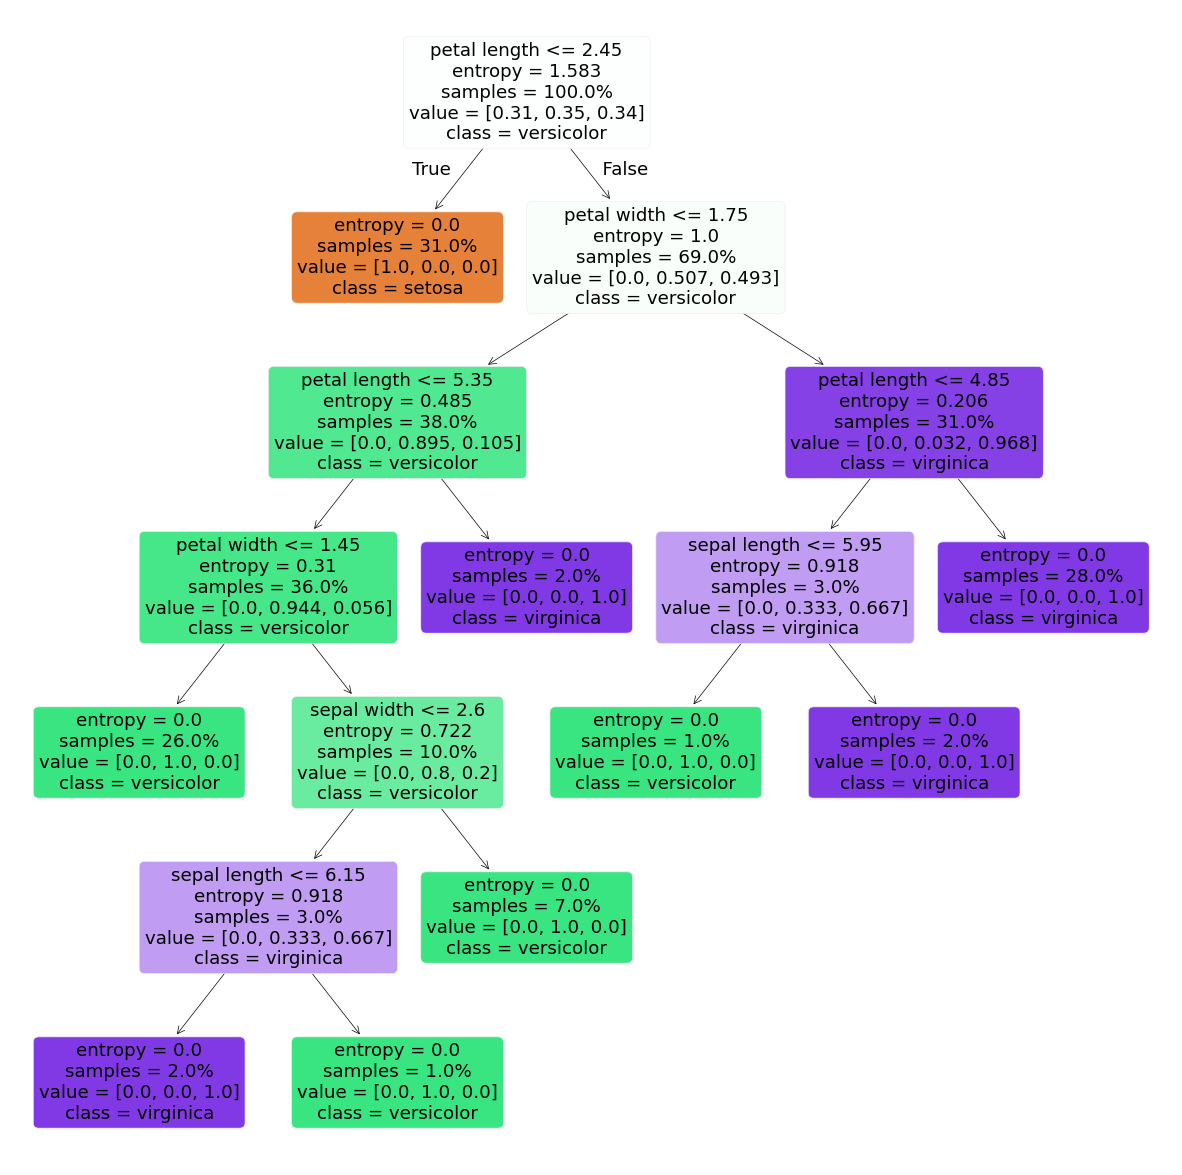

In [ ]:
from matplotlib.pyplot import figure
from sklearn.tree import plot_tree

figure(figsize=(15,15))
plot_tree(model           
          , feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
          , class_names = ['setosa', 'versicolor', 'virginica']
          , filled=True
          , rounded = True
          , proportion = True
          )